# Group project - Air Quality
---
## Analysis


---
## Data Loading

Import necessary libraries, load dataset urls, combine all datasets into one dataframe, separate LEZ and non-LEZ stations

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset URLs
urls = {
    "Anderston": "https://raw.githubusercontent.com/katherineh2/Air_Pollution_Project/refs/heads/main/Cleaned_55033257_glas_anderston.csv",
    "Byres Road": "https://raw.githubusercontent.com/katherineh2/Air_Pollution_Project/refs/heads/main/Cleaned_55043359_glas_byres_rd.csv",
    "High Street": "https://raw.githubusercontent.com/katherineh2/Air_Pollution_Project/refs/heads/main/Cleaned_85360702557_glas_high_st.csv",
    "Townhead": "https://raw.githubusercontent.com/katherineh2/Air_Pollution_Project/refs/heads/main/Cleaned_8536087138_glas_townhead.csv",
    "Kerbside NO2": "https://raw.githubusercontent.com/katherineh2/Air_Pollution_Project/refs/heads/main/Cleaned_8536134593_glas_kerbside_NO2.csv",
    "Great Western Road NO2": "https://raw.githubusercontent.com/katherineh2/Air_Pollution_Project/refs/heads/main/Cleaned_85362384115_glas_gr_western_rd_NO2.csv"
}

# Load datasets and add a location column
dfs = []
for location, url in urls.items():
    df = pd.read_csv(url)
    df['Location'] = location  # Add location column
    dfs.append(df)

# Combine all datasets into one DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Display the first few rows
df_all.head()

# Separate LEZ and non-LEZ stations
stations_inside_LEZ = ['Kerbside NO2', 'High Street', 'Townhead']
stations_outside_LEZ = ['Anderston', 'Byres Road', 'Great Western Road NO2']

df_LEZ = df_all[df_all['Location'].isin(stations_inside_LEZ)]
df_non_LEZ = df_all[df_all['Location'].isin(stations_outside_LEZ)]



---
## Data Exploration

Checking for null values

In [ ]:
# Function to check missing values in each dataset
def check_null_values(datasets):
    for name, df in datasets.items():
        print(f" Checking missing values for {name} dataset:")
        missing_values = df.isnull().sum()
        print(missing_values[missing_values > 0])  # Show only columns with missing values

# Create a dictionary of datasets
datasets = {location: pd.read_csv(url) for location, url in urls.items()}

# Run null value check
check_null_values(datasets)


 Checking missing values for Anderston dataset:
NO2 (µg/m3)      6827
PM10 (µg/m3)     2843
PM2.5 (µg/m3)    2843
dtype: int64
 Checking missing values for Byres Road dataset:
PM10 (µg/m3)     10969
PM2.5 (µg/m3)    10954
dtype: int64
 Checking missing values for High Street dataset:
NO2 (µg/m3)      809
PM10 (µg/m3)     147
PM2.5 (µg/m3)    147
dtype: int64
 Checking missing values for Townhead dataset:
NO2 (µg/m3)      462
PM10 (µg/m3)     212
PM2.5 (µg/m3)    212
dtype: int64
 Checking missing values for Kerbside NO2 dataset:
NO2 (µg/m3)    2456
dtype: int64
 Checking missing values for Great Western Road NO2 dataset:
NO2 (µg/m3)    910
dtype: int64


Calculating the percentage of null values:

In [ ]:
# Function to check percentage of missing values
def check_null_percentage(datasets):
    for name, df in datasets.items():
        print(f" Missing data percentage in {name} dataset:")
        missing_percent = (df.isnull().sum() / len(df)) * 100
        print(missing_percent[missing_percent > 0].round(2))  # Show only columns with missing values

# Run percentage check
check_null_percentage(datasets)

 Missing data percentage in Anderston dataset:
NO2 (µg/m3)      15.11
PM10 (µg/m3)      6.29
PM2.5 (µg/m3)     6.29
dtype: float64
 Missing data percentage in Byres Road dataset:
PM10 (µg/m3)     25.02
PM2.5 (µg/m3)    24.98
dtype: float64
 Missing data percentage in High Street dataset:
NO2 (µg/m3)      1.85
PM10 (µg/m3)     0.34
PM2.5 (µg/m3)    0.34
dtype: float64
 Missing data percentage in Townhead dataset:
NO2 (µg/m3)      1.05
PM10 (µg/m3)     0.48
PM2.5 (µg/m3)    0.48
dtype: float64
 Missing data percentage in Kerbside NO2 dataset:
NO2 (µg/m3)    5.6
dtype: float64
 Missing data percentage in Great Western Road NO2 dataset:
NO2 (µg/m3)    2.08
dtype: float64


Handling Missing Values in Your Datasets

Forward Fill & Backward Fill for Small Missing Values
Used for datasets with low missing percentages (<2-5%), such as:

High Street
Townhead
Kerbside NO₂
Great Western Road NO₂

Forward fill (ffill) fills missing values with the last observed value, ensuring no data loss. If ffill isn't enough, bfill fills the remaining gaps using the next available value.

In [ ]:
for name, df in datasets.items():
    if name in ['High Street', 'Townhead', 'Kerbside NO2', 'Great Western Road NO2','Anderston' ]:
        df.ffill(inplace=True)  # Forward fill
        df.bfill(inplace=True)  # Backward fill

inear Interpolation for Moderate Missing Data
Used for datasets with 6-15% missing values, such as:

Anderston dataset (NO₂: 15.11%, PM10 & PM2.5: 6.29%)

Interpolation estimates missing values based on surrounding points in a time-series trend, keeping the data continuous and realistic.

In [ ]:
for name, df in datasets.items():
    if name in ['Byres Road']:  # Only for Byres Road
        df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
        df[df_numeric.columns] = df_numeric.interpolate(method='linear')  # Apply interpolation only on numeric columns

Interpolation or Mean Imputation for Large Missing Data
Used for datasets with >20% missing values, such as:

Byres Road dataset (PM10: 25.02%, PM2.5: 24.98%)

Interpolation is preferred when gaps are small and spread out.
Mean imputation is a backup if interpolation is unreliable (for example, if large consecutive gaps exist).

In [ ]:
for name, df in datasets.items():
    if name in ['Byres Road']:
        df_numeric = df.select_dtypes(include=['number'])  # Select numeric columns only
        df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())  # Fill with mean only for numeric columns


Check if any missing values remain:

In [ ]:
for name, df in datasets.items():
    missing = df.isnull().sum().sum()
    print(f"Remaining missing values in {name}: {missing}")


Remaining missing values in Anderston: 0
Remaining missing values in Byres Road: 0
Remaining missing values in High Street: 0
Remaining missing values in Townhead: 0
Remaining missing values in Kerbside NO2: 0
Remaining missing values in Great Western Road NO2: 0


Checking whether there are any duplicates in the datasets:

In [ ]:
# Function to check for duplicate records
def check_duplicates(datasets):
    for name, df in datasets.items():
        duplicates = df.duplicated().sum()
        print(f" {name}: {duplicates} duplicate rows found")

# Run duplicate check
check_duplicates(datasets)

 Anderston: 0 duplicate rows found
 Byres Road: 0 duplicate rows found
 High Street: 0 duplicate rows found
 Townhead: 0 duplicate rows found
 Kerbside NO2: 0 duplicate rows found
 Great Western Road NO2: 0 duplicate rows found



---
## Statistical Summary Per Year

Below is how to calculate the statistical summaries of each dataset per year

In [ ]:
# Function to calculate statistical summaries per year
def calculate_summary_by_year(df, datetime_column='Datetime'):
    # Ensure datetime column is in datetime format
    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')

    # Drop rows where datetime conversion failed - heading rows from concatenation
    df = df.dropna(subset=[datetime_column])

    # Extract year from datetime column
    df['Year'] = df[datetime_column].dt.year

    # Group by year and compute statistical summaries
    summary = df.groupby('Year').describe()

    return summary

datasets = {name: pd.read_csv(url) for name, url in urls.items()}

# Run the missing values check
check_null_values(datasets)


# Compute summaries for each dataset
summaries = {name: calculate_summary_by_year(df) for name, df in datasets.items()}

# Display summaries
for name, summary in summaries.items():
    print(f"\nStatistical Summary for {name}:\n")
    print(summary)


 Checking missing values for Anderston dataset:
NO2 (µg/m3)      6827
PM10 (µg/m3)     2843
PM2.5 (µg/m3)    2843
dtype: int64
 Checking missing values for Byres Road dataset:
PM10 (µg/m3)     10969
PM2.5 (µg/m3)    10954
dtype: int64
 Checking missing values for High Street dataset:
NO2 (µg/m3)      809
PM10 (µg/m3)     147
PM2.5 (µg/m3)    147
dtype: int64
 Checking missing values for Townhead dataset:
NO2 (µg/m3)      462
PM10 (µg/m3)     212
PM2.5 (µg/m3)    212
dtype: int64
 Checking missing values for Kerbside NO2 dataset:
NO2 (µg/m3)    2456
dtype: int64
 Checking missing values for Great Western Road NO2 dataset:
NO2 (µg/m3)    910
dtype: int64

Statistical Summary for Anderston:

        Time                                                    NO2 (µg/m3)  \
       count       mean  min   25%   50%    75%   max       std       count   
Year                                                                          
2020  8784.0  11.500000  0.0  5.75  11.5  17.25  23.0  6.922581  

Output displayed summaries of datetime columns which are not needed so we need to refine and exclude unnecessary/irrelevant information

In [ ]:
import pandas as pd

# Function to calculate statistical summaries per year
def calculate_summary_by_year(df, datetime_column='Datetime'):
    print("\nChecking dataset...")
    print("Exact column names detected:", list(df.columns))  # Debugging

    # Ensure dataset is not empty
    if df.empty:
        print(" Warning: Dataset is empty!")
        return pd.DataFrame()

    # Standardize column names: remove spaces and normalize text
    df.columns = df.columns.str.strip()

    # Convert datetime column if it exists
    if datetime_column not in df.columns:
        print(" Warning: Datetime column not found!")
        return pd.DataFrame()

    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')

    # Drop rows where datetime conversion failed - heading rows from concatenation
    df = df.dropna(subset=[datetime_column])

    if df.empty:
        print(" Warning: All datetime values are NaN after conversion!")
        return pd.DataFrame()

    df['Year'] = df[datetime_column].dt.year

    # Dynamically detect air quality columns (NO2, PM10, PM2.5)
    pollutant_columns = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]

    if not pollutant_columns:
        print(" Warning: No relevant air quality columns found!")
        return pd.DataFrame()

    df_filtered = df[['Year'] + pollutant_columns]


    # Group by year and compute statistics, then round to 2 decimal places
    summary = df_filtered.groupby('Year').agg(['count', 'mean', 'min', 'max', 'std']).round(2)


    return summary

# Load datasets
datasets = {name: pd.read_csv(url) for name, url in urls.items()}

# Compute summaries for each dataset with debugging
summaries = {}
for name, df in datasets.items():
    print(f"\nProcessing dataset: {name}")
    summary = calculate_summary_by_year(df)
    if summary.empty:
        print(f" No valid summary generated for {name}")
    else:
        summaries[name] = summary



Processing dataset: Anderston

Checking dataset...
Exact column names detected: ['Date', 'Time', 'NO2 (µg/m3)', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'Datetime']

Processing dataset: Byres Road

Checking dataset...
Exact column names detected: ['Date', 'Time', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'Datetime']

Processing dataset: High Street

Checking dataset...
Exact column names detected: ['Date', 'Time', 'NO2 (µg/m3)', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'Datetime']

Processing dataset: Townhead

Checking dataset...
Exact column names detected: ['Date', 'Time', 'NO2 (µg/m3)', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'Datetime']

Processing dataset: Kerbside NO2

Checking dataset...
Exact column names detected: ['Date', 'Time', 'NO2 (µg/m3)', 'Datetime']

Processing dataset: Great Western Road NO2

Checking dataset...
Exact column names detected: ['Date', 'Time', 'NO2 (µg/m3)', 'Datetime']


In [ ]:
# Compute summaries for each dataset with debugging
summaries = {}
for name, df in datasets.items():
    print(f"\nProcessing dataset: {name}")
    summary = calculate_summary_by_year(df)
    if summary.empty:
        print(f" No valid summary generated for {name}")
    else:
        summaries[name] = summary
        print(f" Summary generated for {name}:\n", summary.head())  # Print first few rows



Processing dataset: Anderston

Checking dataset...
Exact column names detected: ['Date', 'Time', 'NO2 (µg/m3)', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'Datetime']
 Summary generated for Anderston:
      NO2 (µg/m3)                             PM10 (µg/m3)               \
           count   mean   min     max    std        count   mean   min   
Year                                                                     
2020        8640  19.50  0.10  113.01  16.93         6260   9.02  0.47   
2021        5679  21.23  0.22   99.61  16.34         8675  10.50  0.41   
2022        8670  21.61  0.17  113.14  18.22         8590  12.00  0.46   
2023        8725  20.49  0.02   87.56  15.20         8729  10.44  0.37   
2024        5311  21.50 -0.17   93.90  18.58         8757  11.31  0.31   

                   PM2.5 (µg/m3)                           
         max   std         count  mean   min    max   std  
Year                                                       
2020   50.36  5.67          6260  

**Overview of the Code for Summary Statistics:**

Our Python script processes multiple air quality datasets, extracts relevant pollutant data, and generates annual summary statistics.

**Step-by-Step Explanation**

**Loading Datasets:**

We defined a dictionary of dataset URLs and used pandas.read_csv() to load them into DataFrames.

**Processing Each Dataset:**

The script checks if the dataset is empty and prints the column names for debugging.

**Extracting Relevant Pollutants:**

Since different datasets contain NO₂, PM10, or PM2.5, we dynamically detect available pollutant columns instead of hardcoding them.

**Grouping Data by Year:**

We extract the year from the Datetime column.
The data is grouped by year using .groupby('Year').

**Computing Summary Statistics:**

We calculate count, mean, min, max, and standard deviation for each pollutant using .agg(['count', 'mean', 'min', 'max', 'std']).

**Output Results:**

The script prints the summary statistics for each dataset.
If a dataset lacks pollutants or valid datetime values, a warning is displayed.



---
## Data Distribution

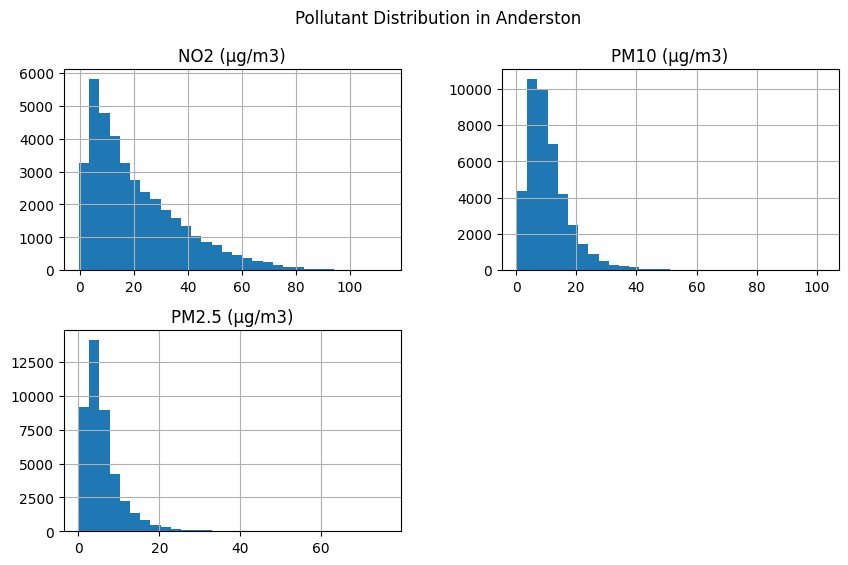

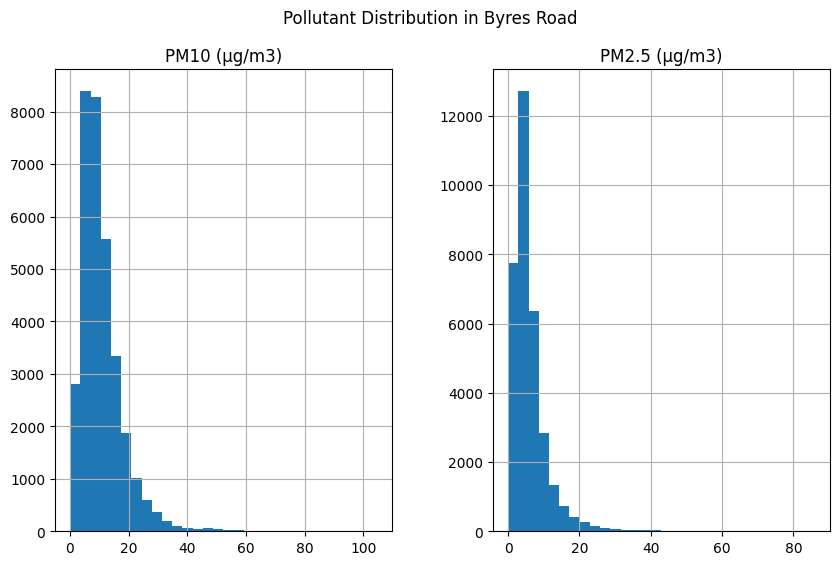

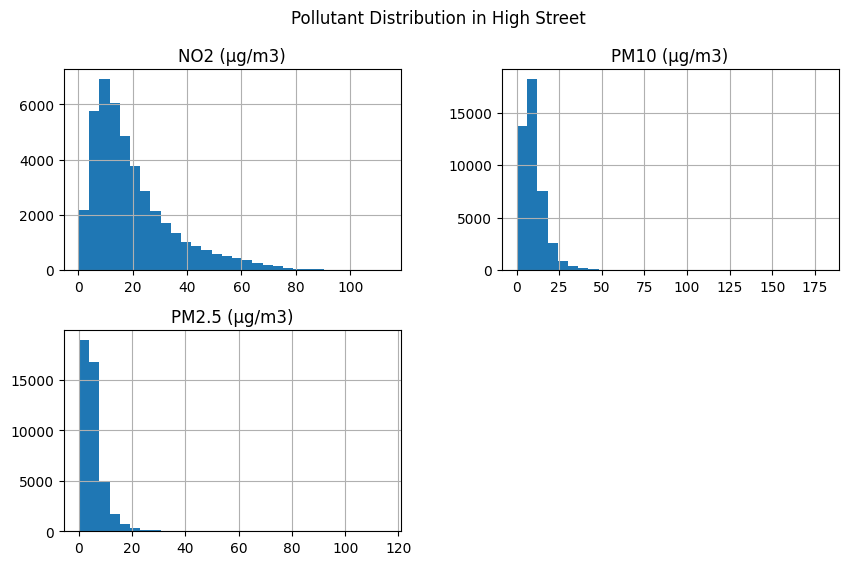

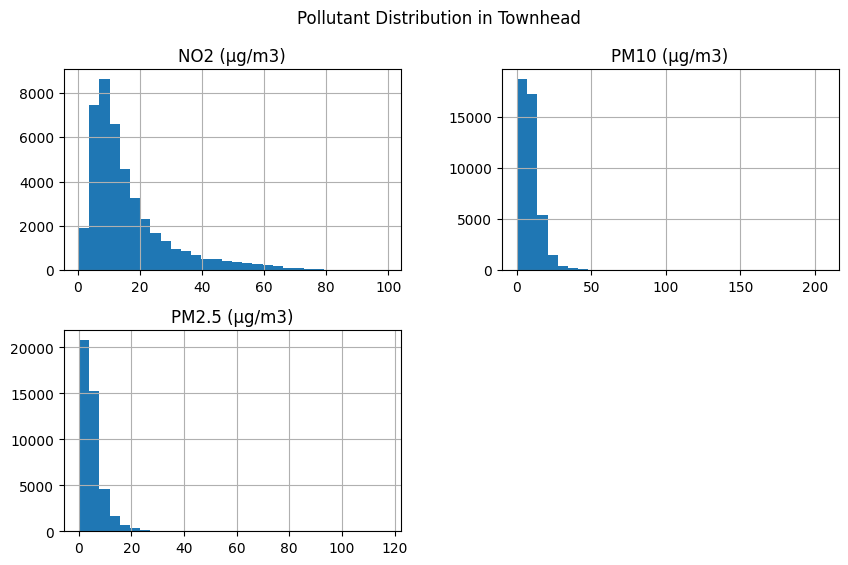

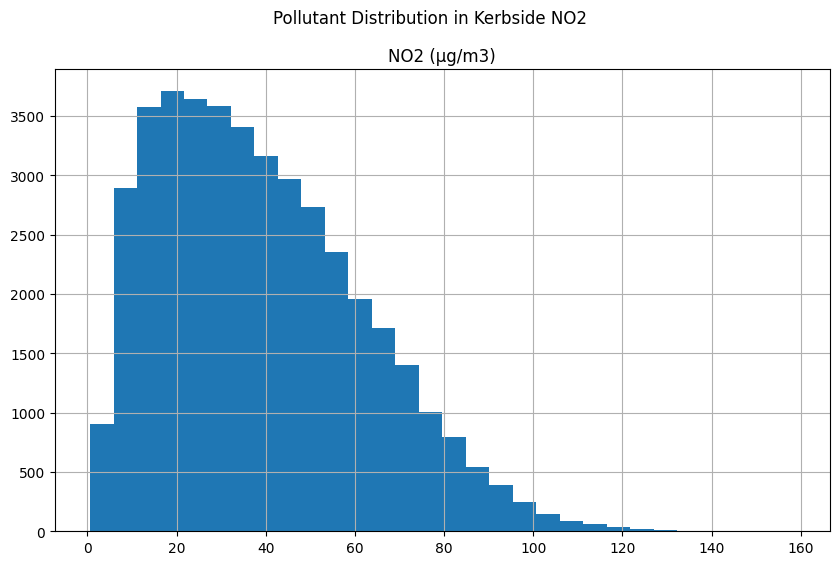

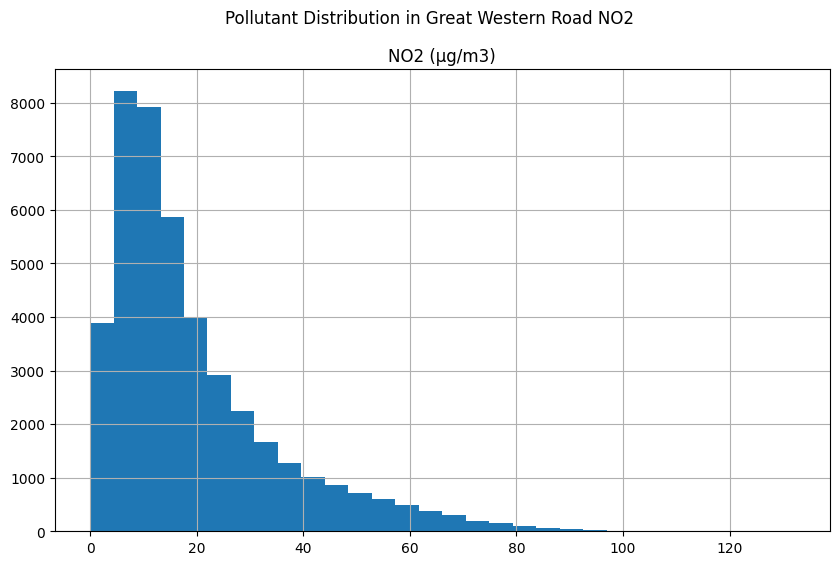

In [ ]:
import matplotlib.pyplot as plt

# Function to plot histograms of pollutant levels
def plot_histograms(datasets):
    for name, df in datasets.items():
        pollutants = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]
        if pollutants:
            df[pollutants].hist(figsize=(10, 6), bins=30)
            plt.suptitle(f"Pollutant Distribution in {name}")
            plt.show()

# Run histogram plots
plot_histograms(datasets)


The air quality data across Great Western Road, Kerbside, Townhead, High Street, Byres Road, and Anderston shows right-skewed distributions for NO₂, PM10, and PM2.5. This indicates that while pollution levels are generally low, there are occasional high spikes, likely due to traffic, construction, and weather conditions. These peaks suggest that pollution events are infrequent but can be severe when they occur.

Kerbside and High Street exhibit higher NO₂ levels compared to other locations, likely due to their proximity to major roads and heavy traffic. Townhead, High Street, and Anderston have notable spikes in PM2.5 and PM10, indicating fine particulate pollution, which could be linked to vehicle emissions, industrial activities, or urban dust. Byres Road follows a similar trend but with fewer extreme peaks.

The presence of occasional extreme pollution events in all locations suggests that while air quality is mostly within safe limits, periods of high exposure can still occur. If the Low Emission Zone (LEZ) policy is effective, we should observe fewer and less intense pollution spikes over time. Comparing NO₂ levels before and after the LEZ implementation will help assess its impact on air quality.

---
## Detecting Outliers

The next step is to detect outliers by creating boxplots:

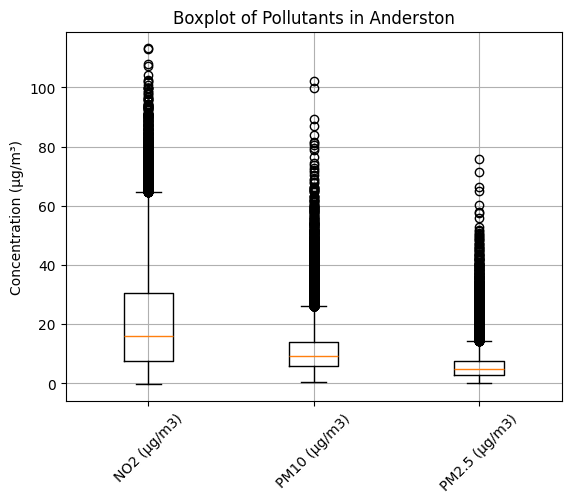

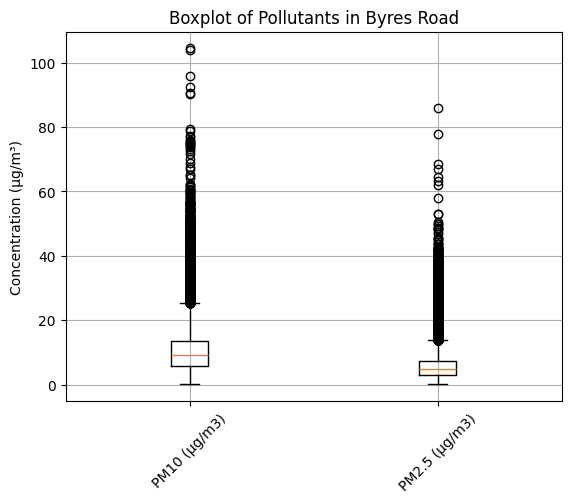

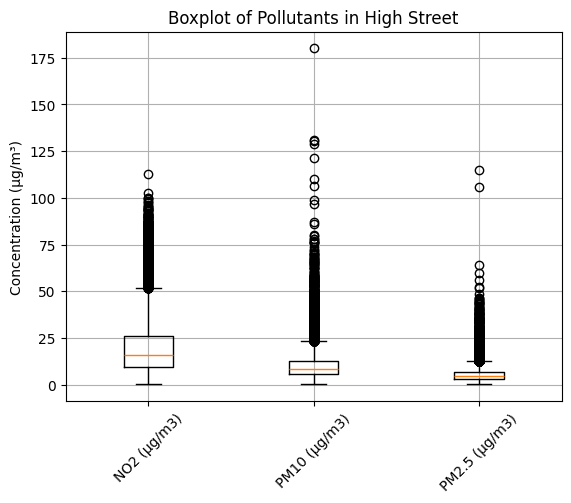

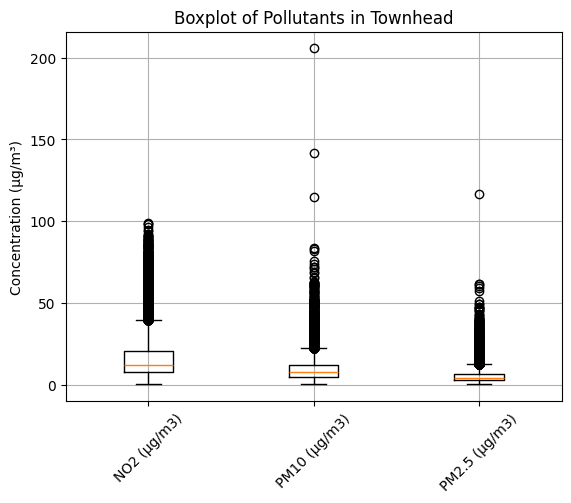

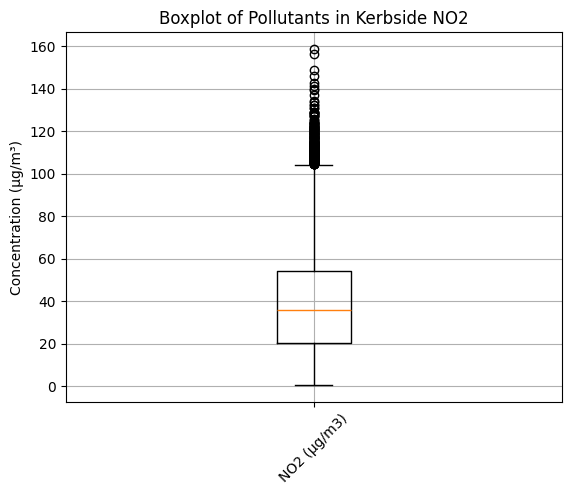

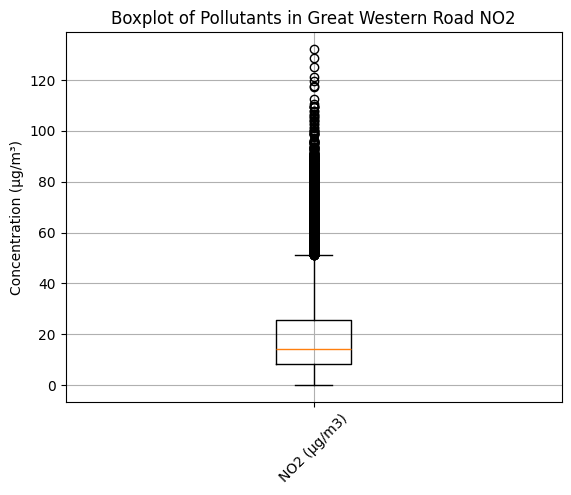

In [ ]:
import matplotlib.pyplot as plt

# Function to create boxplots using only Matplotlib (Updated for Matplotlib 3.9+)
def plot_boxplots(datasets):
    for name, df in datasets.items():
        pollutants = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]

        if pollutants:
            plt.figure()#figsize=(10, 6))
            plt.boxplot([df[pollutant].dropna() for pollutant in pollutants], tick_labels=pollutants, vert=True)

            plt.title(f"Boxplot of Pollutants in {name}")
            plt.ylabel("Concentration (µg/m³)")
            plt.xticks(rotation=45)
            plt.grid(True)
            plt.show()

# Run updated boxplots
plot_boxplots(datasets)


The boxplots across Anderston, Byres Road, High Street, Townhead, Kerbside, and Great Western Road provide insights into the distribution of NO₂, PM10, and PM2.5 concentrations. They highlight the central tendency (median), spread, and presence of extreme values (outliers) in each location.

In Anderston, all three pollutants show a right-skewed distribution with a high number of outliers. The median NO₂, PM10, and PM2.5 values are relatively low, but the upper whiskers and extreme outliers indicate occasional high pollution events. This suggests that while average air quality is acceptable, there are spikes in pollution levels, likely influenced by traffic or industrial activities.

Byres Road exhibits similar characteristics for PM10 and PM2.5, with a low median but many outliers. This indicates that pollution levels are usually low, but extreme peaks occur periodically, likely due to traffic emissions or weather conditions affecting air quality. The spread of PM2.5 is narrower than PM10, implying that smaller particulate matter pollution is more consistent, whereas PM10 experiences more fluctuations.

High Street and Townhead both have higher medians for NO₂ and PM10 compared to other locations. The presence of many outliers beyond 100 µg/m³ suggests frequent severe pollution events. This makes sense as High Street and Townhead are urban, high-traffic areas, where pollution from vehicles and other sources is more persistent.

In Kerbside and Great Western Road, NO₂ levels show a higher median concentration compared to other locations, with many extreme values above 100 µg/m³. The large number of outliers confirms that NO₂ pollution is highly variable, with significant peaks likely tied to traffic congestion. The higher median in Kerbside suggests that locations near major roads experience consistent NO₂ exposure.

---
## Statistical Analysis using different graphs

Analyse time trends for each station:

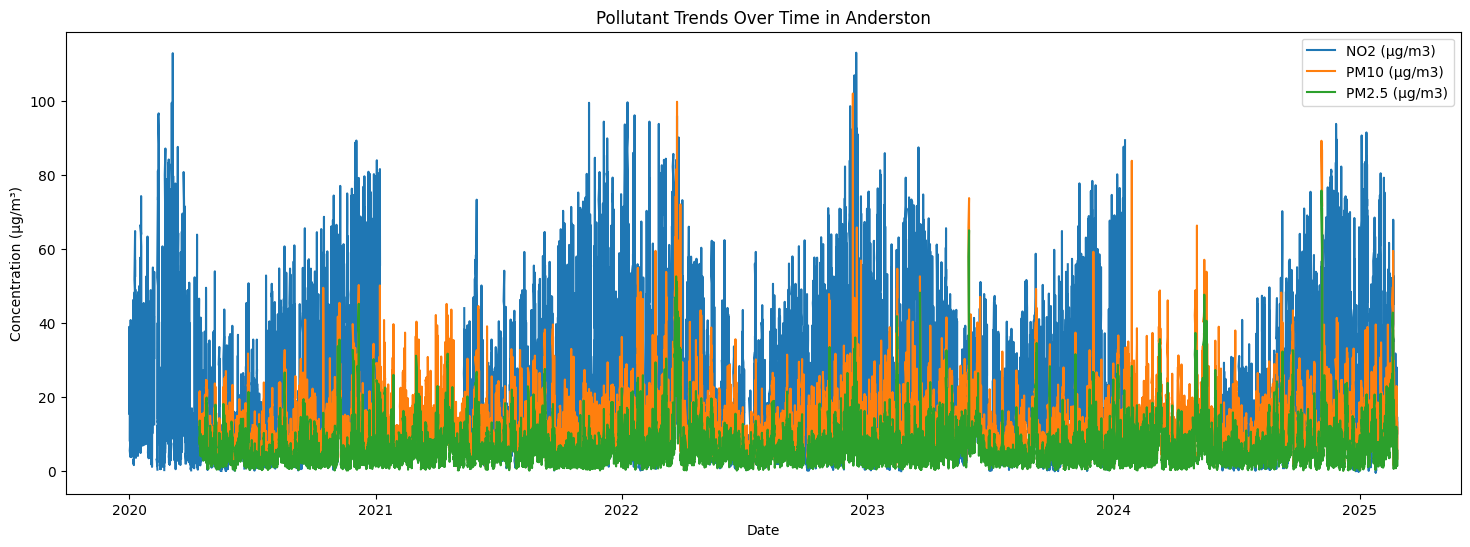

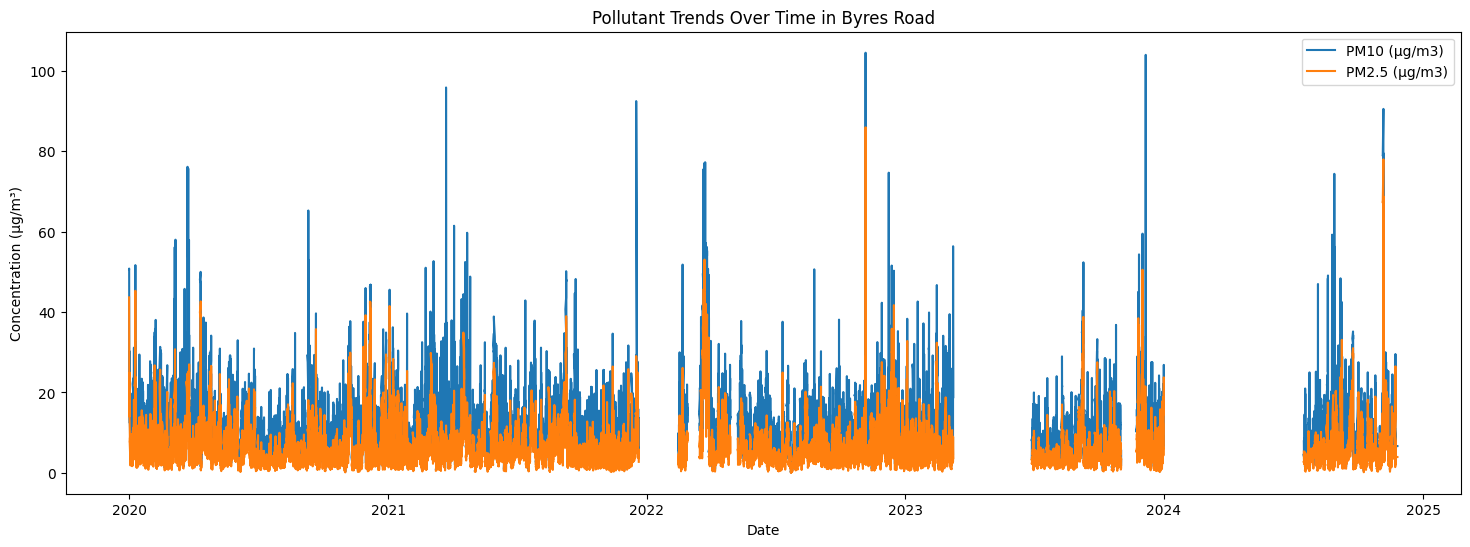

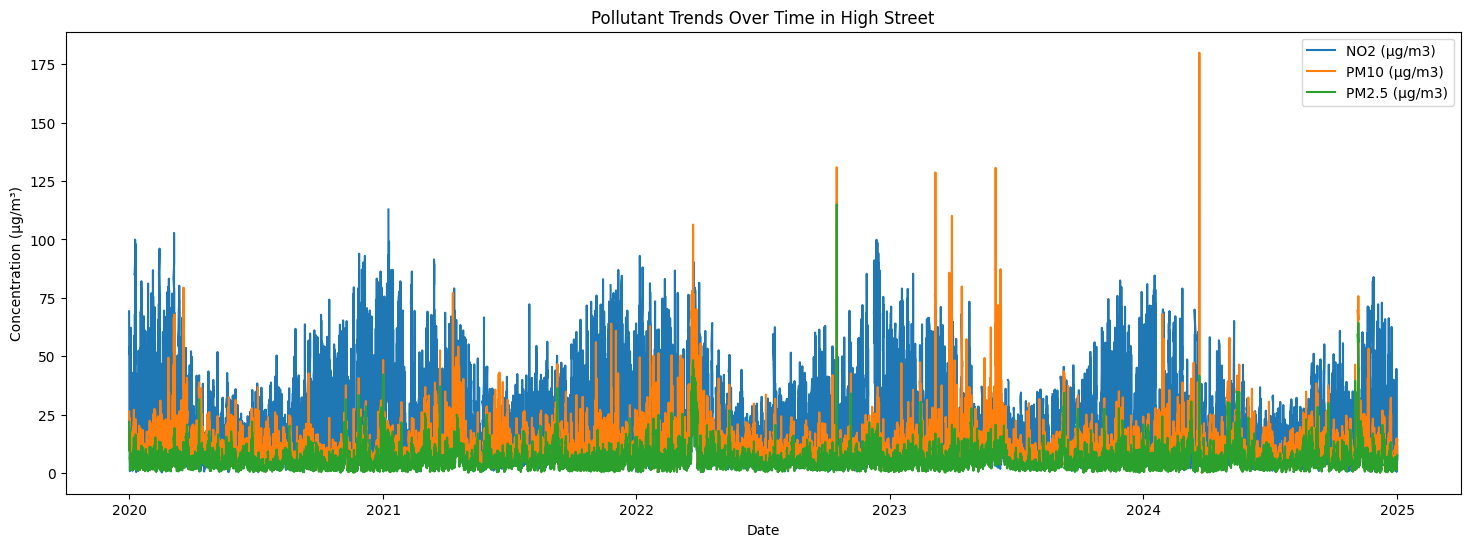

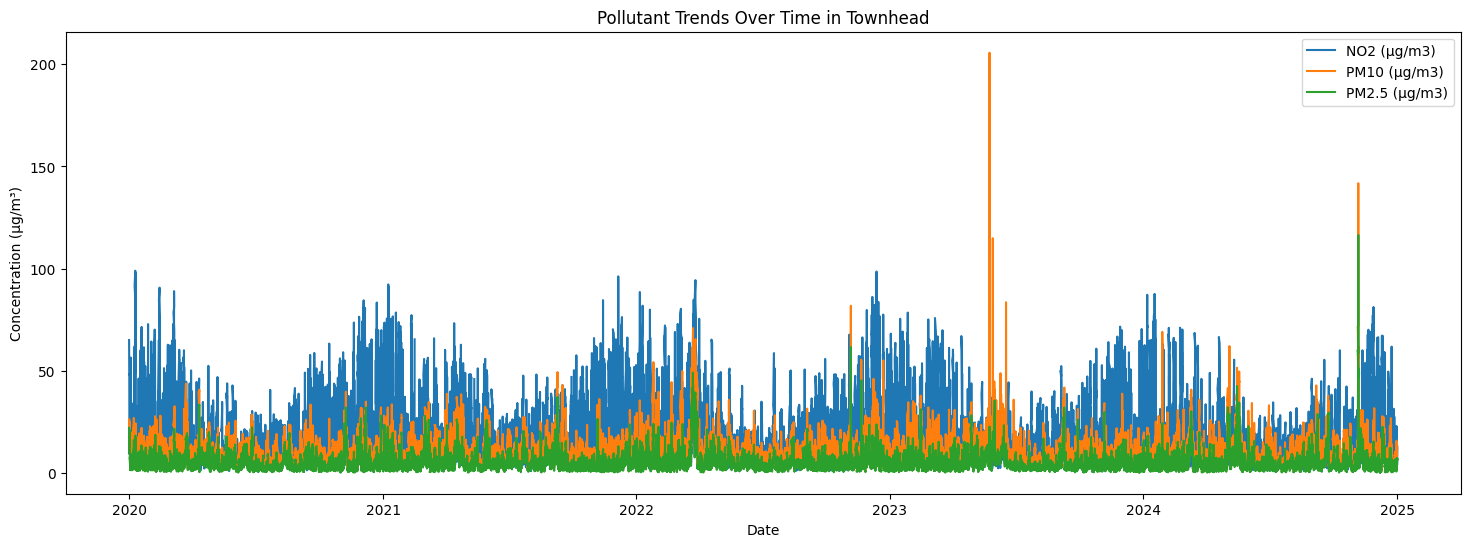

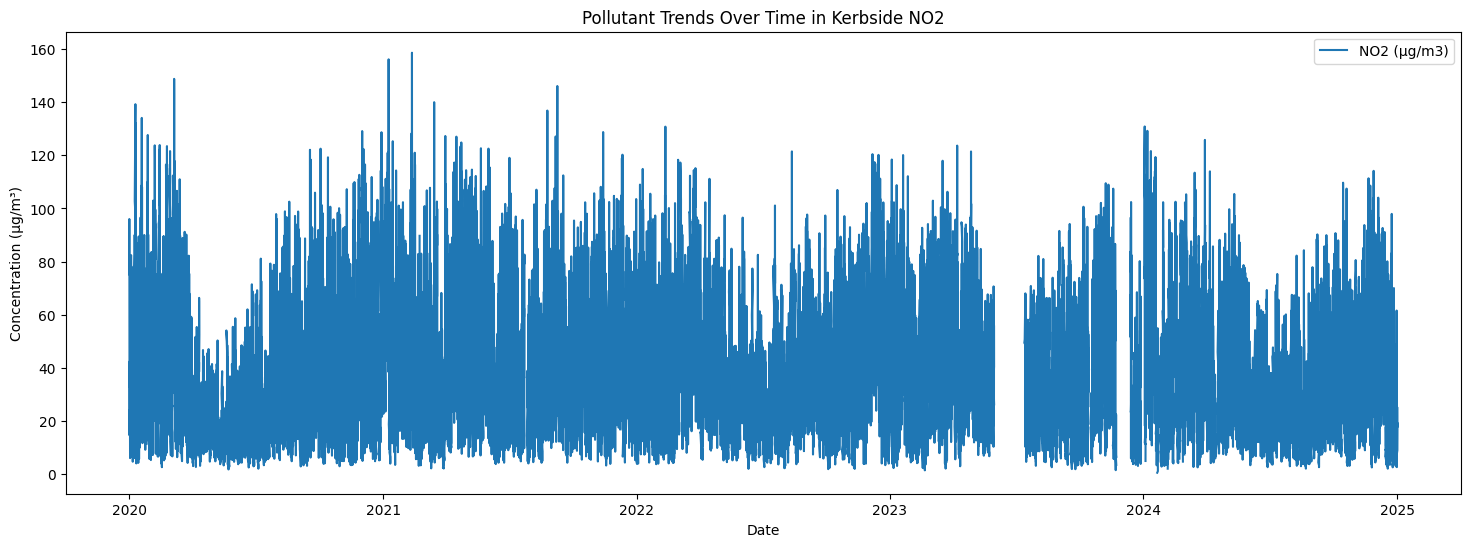

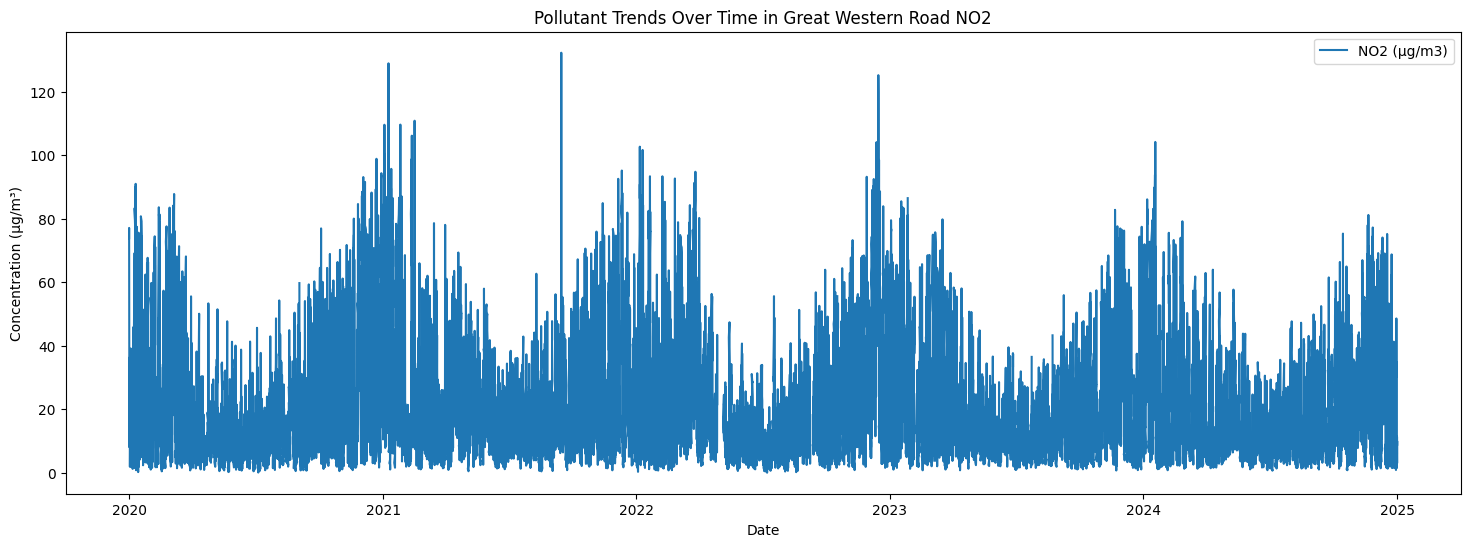

In [ ]:
# Function to plot pollutant levels over time
def plot_time_series(datasets):
    for name, df in datasets.items():
        pollutants = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]

        if pollutants:
            plt.figure(figsize=(18, 6))
            for pollutant in pollutants:
                #if 'NO2' in pollutant:   ## we can add this if you think it would be good to have the colours stay consistant
                #    colour = 'tab:blue'
                #if 'PM10' in pollutant:
                #    colour = 'tab:orange'
                #if 'PM2.5' in pollutant:
                #    colour = 'tab:green'
                plt.plot(df['Datetime'], df[pollutant], label=pollutant)#, color = colour)

            plt.title(f"Pollutant Trends Over Time in {name}")
            plt.xlabel("Date")
            plt.ylabel("Concentration (µg/m³)")
            plt.legend()
            plt.show()

# Run time series plots
plot_time_series(datasets)


The time series plots for Anderston, Byres Road, High Street, Townhead, Kerbside, and Great Western Road show clear seasonal variations and long-term trends in NO₂, PM10, and PM2.5 concentrations. Across all locations, we observe recurring peaks in pollution levels.

In Anderston, High Street, and Townhead, NO₂ levels fluctuate significantly, with noticeable spikes in winter months, possibly due to increased heating emissions and stagnant atmospheric conditions. The data suggests periodic high pollution events, potentially linked to traffic congestion and industrial activity. PM10 and PM2.5 remain lower in magnitude but still exhibit seasonal variations. A similar trend is evident in Byres Road, where PM10 and PM2.5 follow a consistent pattern, but NO₂ is absent.

Kerbside and Great Western Road show consistently high NO₂ concentrations with frequent peaks exceeding 100 µg/m³, confirming that traffic-heavy areas experience prolonged exposure to nitrogen dioxide. These locations likely serve as strong indicators of vehicle emissions' impact on air quality. The trends also show short-term drops in pollution, possibly linked to COVID-19 lockdown periods, followed by a gradual resurgence in NO₂ levels.

Now we would like to see if there is a correlation between the pollutants:

In [ ]:
# Function to compute correlation matrix
def compute_correlations(datasets):
    for name, df in datasets.items():
        pollutants = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]
        if len(pollutants) > 1:
            corr_matrix = df[pollutants].corr().round(2)
            print(f"\n🔗 Correlation Matrix for {name}:")
            print(corr_matrix)

# Run correlation analysis
compute_correlations(datasets)


🔗 Correlation Matrix for Anderston:
               NO2 (µg/m3)  PM10 (µg/m3)  PM2.5 (µg/m3)
NO2 (µg/m3)           1.00          0.36           0.39
PM10 (µg/m3)          0.36          1.00           0.92
PM2.5 (µg/m3)         0.39          0.92           1.00

🔗 Correlation Matrix for Byres Road:
               PM10 (µg/m3)  PM2.5 (µg/m3)
PM10 (µg/m3)           1.00           0.89
PM2.5 (µg/m3)          0.89           1.00

🔗 Correlation Matrix for High Street:
               NO2 (µg/m3)  PM10 (µg/m3)  PM2.5 (µg/m3)
NO2 (µg/m3)           1.00          0.21           0.19
PM10 (µg/m3)          0.21          1.00           0.85
PM2.5 (µg/m3)         0.19          0.85           1.00

🔗 Correlation Matrix for Townhead:
               NO2 (µg/m3)  PM10 (µg/m3)  PM2.5 (µg/m3)
NO2 (µg/m3)           1.00          0.25           0.26
PM10 (µg/m3)          0.25          1.00           0.92
PM2.5 (µg/m3)         0.26          0.92           1.00


Correlation heatmap:

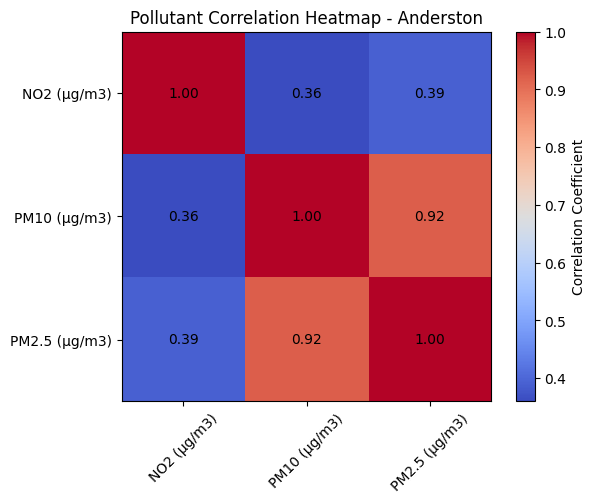

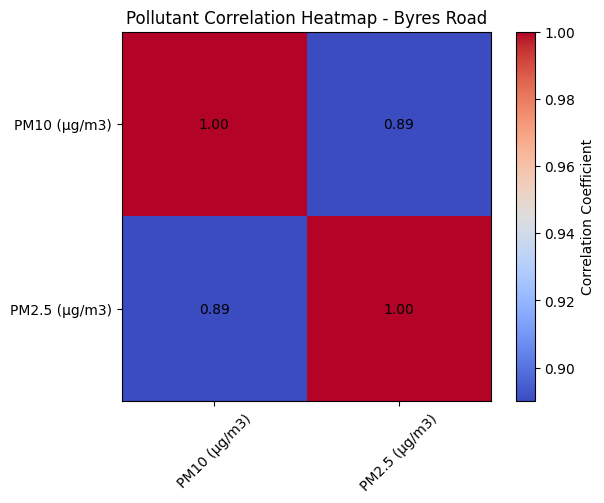

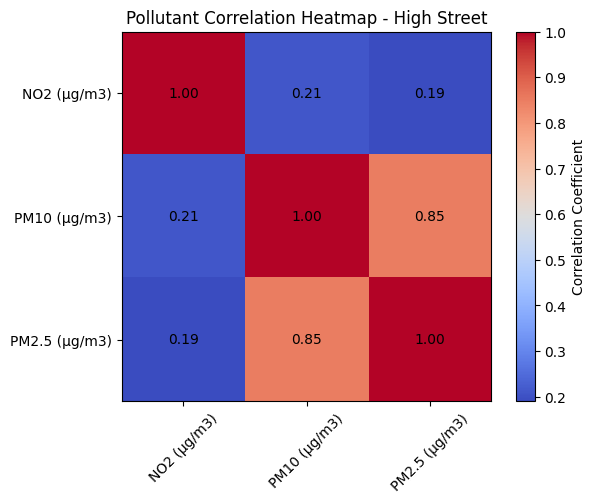

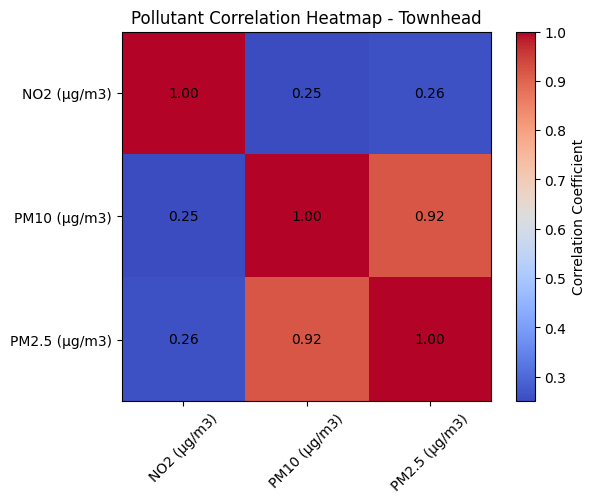

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to compute and plot a correlation heatmap
def plot_correlation_heatmap(datasets):
    for name, df in datasets.items():
        pollutants = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]

        if len(pollutants) > 1:  # Ensure there's more than one pollutant to correlate
            corr_matrix = df[pollutants].corr().round(2)  # Compute correlation

            plt.figure()#figsize=(8, 6))
            plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')  # Heatmap

            # Add colorbar
            plt.colorbar(label="Correlation Coefficient")

            # Set axis labels
            plt.xticks(ticks=np.arange(len(pollutants)), labels=pollutants, rotation=45)
            plt.yticks(ticks=np.arange(len(pollutants)), labels=pollutants)

            # Add correlation values to the heatmap
            for i in range(len(pollutants)):
                for j in range(len(pollutants)):
                    plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color="black")

            plt.title(f"Pollutant Correlation Heatmap - {name}")
            plt.show()

# Run the function
plot_correlation_heatmap(datasets)


**How to Interpret the Heatmap**

**Values near 1.00** → Strong positive correlation (pollutants rise/fall together).

**Values near -1.00** → Strong negative correlation (one pollutant increases as another decreases).

**Values near 0.00** → No correlation.

**For example:**

If NO₂ and PM2.5 have a correlation of 0.85, they likely come from similar pollution sources.

If PM10 and PM2.5 have a lower correlation, they may originate from different sources.

The heatmap function only works for datasets that have at least two pollutant columns (NO₂, PM10, or PM2.5).

If a dataset is missing one or more pollutants, it gets skipped because a correlation matrix requires at least two variables to compare.

---
## Compare Pre-LEZ vs. Post-LEZ Impact

In [ ]:
# Function to compare pre- and post-LEZ pollutant levels
def compare_pre_post_lez(datasets, lez_start='2022-06-01'):
    lez_date = pd.to_datetime(lez_start)

    for name, df in datasets.items():
        df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
        pre_lez = df[df['Datetime'] < lez_date]
        post_lez = df[df['Datetime'] >= lez_date]

        pollutants = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]

        for pollutant in pollutants:
            pre_mean = pre_lez[pollutant].mean()
            post_mean = post_lez[pollutant].mean()

            print(f"\n📉 {name} - {pollutant}:")
            print(f"  Before LEZ: {pre_mean:.2f} µg/m³")
            print(f"  After LEZ: {post_mean:.2f} µg/m³")

# Run pre/post LEZ comparison
compare_pre_post_lez(datasets)


📉 Anderston - NO2 (µg/m3):
  Before LEZ: 20.62 µg/m³
  After LEZ: 21.49 µg/m³

📉 Anderston - PM10 (µg/m3):
  Before LEZ: 10.68 µg/m³
  After LEZ: 10.97 µg/m³

📉 Anderston - PM2.5 (µg/m3):
  Before LEZ: 5.94 µg/m³
  After LEZ: 6.12 µg/m³

📉 Byres Road - PM10 (µg/m3):
  Before LEZ: 11.36 µg/m³
  After LEZ: 10.05 µg/m³

📉 Byres Road - PM2.5 (µg/m3):
  Before LEZ: 6.29 µg/m³
  After LEZ: 5.64 µg/m³

📉 High Street - NO2 (µg/m3):
  Before LEZ: 22.28 µg/m³
  After LEZ: 18.13 µg/m³

📉 High Street - PM10 (µg/m3):
  Before LEZ: 10.53 µg/m³
  After LEZ: 9.56 µg/m³

📉 High Street - PM2.5 (µg/m3):
  Before LEZ: 5.55 µg/m³
  After LEZ: 5.29 µg/m³

📉 Townhead - NO2 (µg/m3):
  Before LEZ: 17.54 µg/m³
  After LEZ: 15.34 µg/m³

📉 Townhead - PM10 (µg/m3):
  Before LEZ: 9.52 µg/m³
  After LEZ: 9.12 µg/m³

📉 Townhead - PM2.5 (µg/m3):
  Before LEZ: 5.38 µg/m³
  After LEZ: 5.06 µg/m³

📉 Kerbside NO2 - NO2 (µg/m3):
  Before LEZ: 40.61 µg/m³
  After LEZ: 37.60 µg/m³

📉 Great Western Road NO2 - NO2 (µg/m3):
  

A bar chart would be a much better way to visually compare pre-LEZ and post-LEZ pollution levels instead of just text.

This will make it easier to see increases or decreases in pollutant levels.

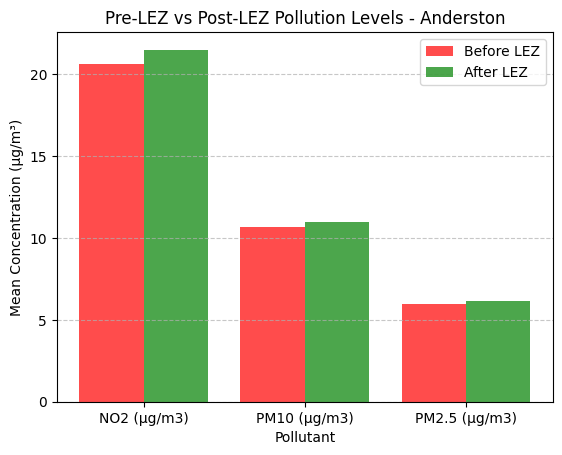

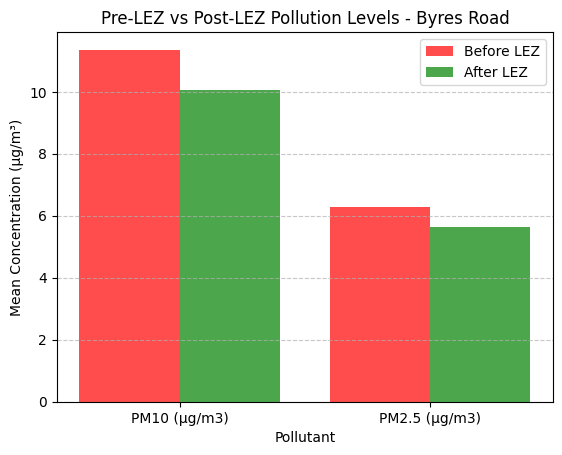

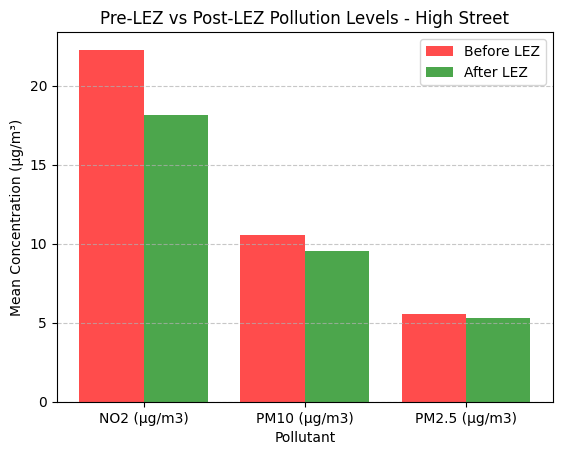

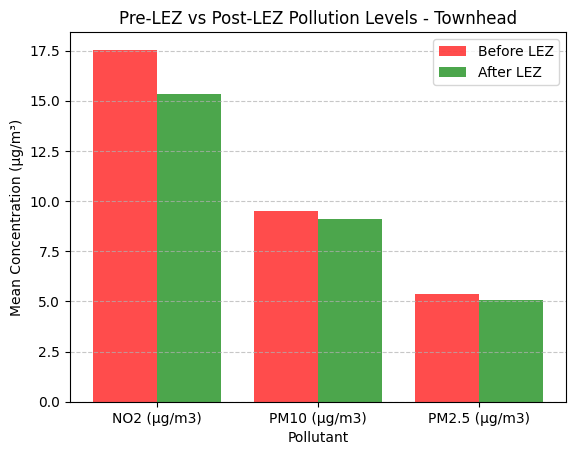

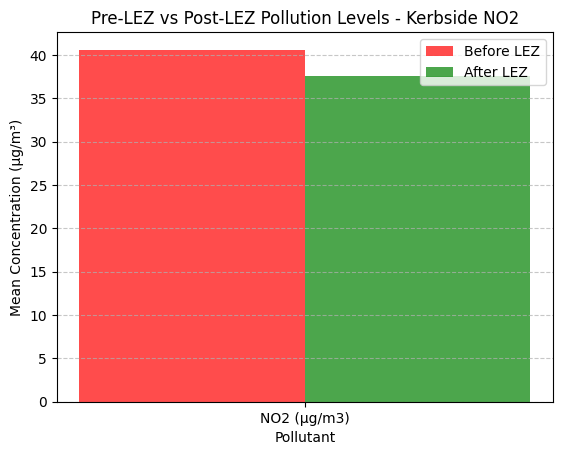

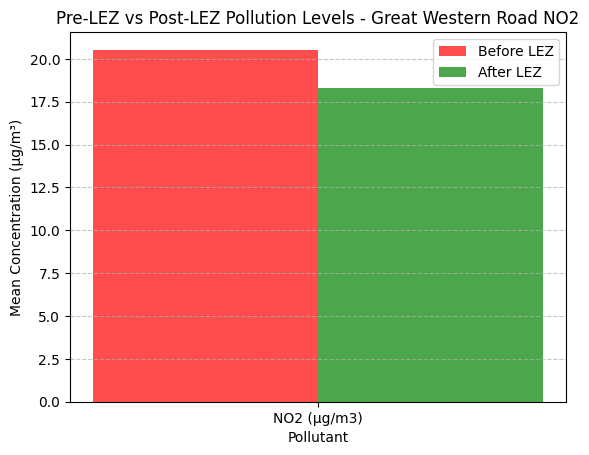

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to compare pre- and post-LEZ pollutant levels using bar charts
def compare_pre_post_lez_plot(datasets, lez_start='2022-06-01'):
    lez_date = pd.to_datetime(lez_start)

    for name, df in datasets.items():
        df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
        pre_lez = df[df['Datetime'] < lez_date]
        post_lez = df[df['Datetime'] >= lez_date]

        pollutants = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]

        if pollutants:
            pre_means = []
            post_means = []
            labels = []

            for pollutant in pollutants:
                pre_mean = pre_lez[pollutant].mean()
                post_mean = post_lez[pollutant].mean()

                pre_means.append(pre_mean)
                post_means.append(post_mean)
                labels.append(pollutant)

            # Plot bar chart
            x = np.arange(len(labels))  # X-axis positions
            width = 0.4  # Bar width

            plt.figure()#figsize=(10, 6))
            plt.bar(x - width/2, pre_means, width, label="Before LEZ", color='red', alpha=0.7)
            plt.bar(x + width/2, post_means, width, label="After LEZ", color='green', alpha=0.7)

            plt.xlabel("Pollutant")
            plt.ylabel("Mean Concentration (µg/m³)")
            plt.title(f"Pre-LEZ vs Post-LEZ Pollution Levels - {name}")
            plt.xticks(ticks=x, labels=labels)
            plt.legend()
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

# Run the function
compare_pre_post_lez_plot(datasets)


The bar charts compare average NO₂, PM10, and PM2.5 levels before and after the implementation of the Low Emission Zone (LEZ) in various locations. While some areas show a decline in pollution levels, others display minimal change or even slight increases.

In Anderston, High Street, and Townhead, NO₂ levels have slightly decreased post-LEZ, suggesting some improvement in air quality. PM10 and PM2.5 show minimal reductions, indicating that particulate matter might be influenced by sources other than vehicle emissions, such as construction or background pollution.

Byres Road shows a noticeable drop in PM10 and PM2.5 concentrations, reflecting the impact of reduced traffic emissions. Similarly, Kerbside and Great Western Road have experienced a slight reduction in NO₂, but the overall decrease is marginal, which could suggest LEZ enforcement challenges or continued emissions from exempt vehicles.

---
## Statistical Tests for Pre- vs. Post-LEZ per Station

In [ ]:
from scipy.stats import ttest_ind

# Function to perform statistical tests for pre vs. post LEZ
def statistical_difference_pre_post_lez(datasets, lez_start='2023-06-01', alpha=0.05):
    lez_date = pd.to_datetime(lez_start)

    results = {}

    for name, df in datasets.items():
        df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
        pre_lez = df[df['Datetime'] < lez_date]
        post_lez = df[df['Datetime'] >= lez_date]

        pollutants = [col for col in df.columns if any(x in col.lower() for x in ['no2', 'pm10', 'pm2.5'])]

        station_results = {}

        for pollutant in pollutants:
            pre_values = pre_lez[pollutant].dropna()
            post_values = post_lez[pollutant].dropna()

            if len(pre_values) > 10 and len(post_values) > 10:  # Ensure enough data points
                t_stat, p_value = ttest_ind(pre_values, post_values, equal_var=False)  # Welch’s t-test

                station_results[pollutant] = {
                    "Pre-LEZ Mean": round(pre_values.mean(), 2),
                    "Post-LEZ Mean": round(post_values.mean(), 2),
                    "p-value": round(p_value, 4),
                    "Statistically Significant": p_value < alpha  # True if significant
                }
            else:
                station_results[pollutant] = "⚠️ Not enough data for statistical test"

        results[name] = station_results

    return results

# Run the statistical analysis
stat_results = statistical_difference_pre_post_lez(datasets)

# Display the results
for station, pollutants in stat_results.items():
    print(f"\n📊 {station} - Statistical Difference Analysis:")
    for pollutant, result in pollutants.items():
        if isinstance(result, dict):
            print(f"   {pollutant}:")
            print(f"      🔹 Pre-LEZ Mean: {result['Pre-LEZ Mean']} µg/m³")
            print(f"      🔹 Post-LEZ Mean: {result['Post-LEZ Mean']} µg/m³")
            print(f"      🔹 p-value: {result['p-value']}")
            print(f"      🔹 Statistically Significant Change: {result['Statistically Significant']}")
        else:
            print(f"   {pollutant}: {result}")  # Not enough data warning



📊 Anderston - Statistical Difference Analysis:
   NO2 (µg/m3):
      🔹 Pre-LEZ Mean: 20.92 µg/m³
      🔹 Post-LEZ Mean: 21.45 µg/m³
      🔹 p-value: 0.0061
      🔹 Statistically Significant Change: True
   PM10 (µg/m3):
      🔹 Pre-LEZ Mean: 10.81 µg/m³
      🔹 Post-LEZ Mean: 10.91 µg/m³
      🔹 p-value: 0.2059
      🔹 Statistically Significant Change: False
   PM2.5 (µg/m3):
      🔹 Pre-LEZ Mean: 5.97 µg/m³
      🔹 Post-LEZ Mean: 6.17 µg/m³
      🔹 p-value: 0.0001
      🔹 Statistically Significant Change: True

📊 Byres Road - Statistical Difference Analysis:
   PM10 (µg/m3):
      🔹 Pre-LEZ Mean: 11.11 µg/m³
      🔹 Post-LEZ Mean: 9.71 µg/m³
      🔹 p-value: 0.0
      🔹 Statistically Significant Change: True
   PM2.5 (µg/m3):
      🔹 Pre-LEZ Mean: 6.13 µg/m³
      🔹 Post-LEZ Mean: 5.61 µg/m³
      🔹 p-value: 0.0
      🔹 Statistically Significant Change: True

📊 High Street - Statistical Difference Analysis:
   NO2 (µg/m3):
      🔹 Pre-LEZ Mean: 21.56 µg/m³
      🔹 Post-LEZ Mean: 17.1

Bar Chart for Statistical Differences (Pre vs. Post-LEZ)
To visualize the statistical results, we'll plot a bar chart:

Red bars → Pre-LEZ pollution levels
Green bars → Post-LEZ pollution levels

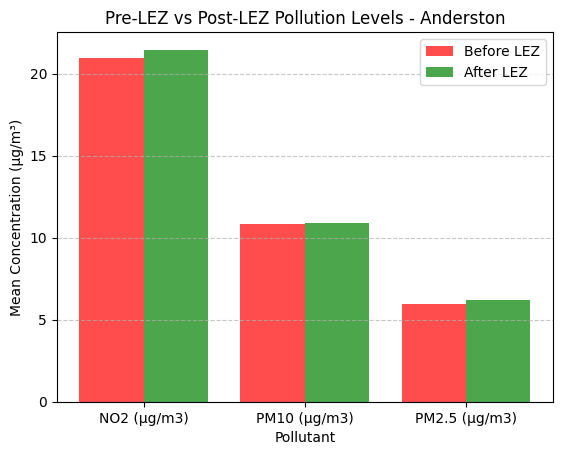

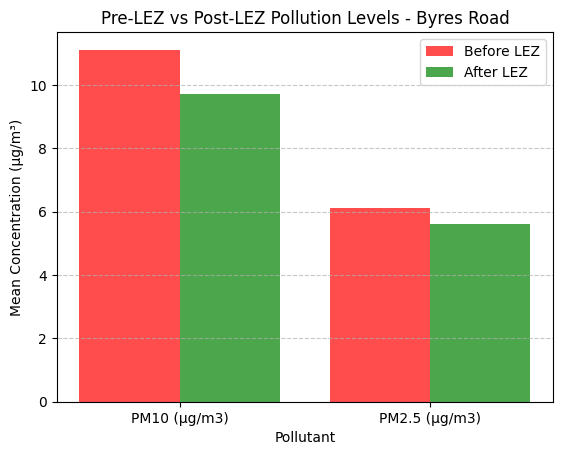

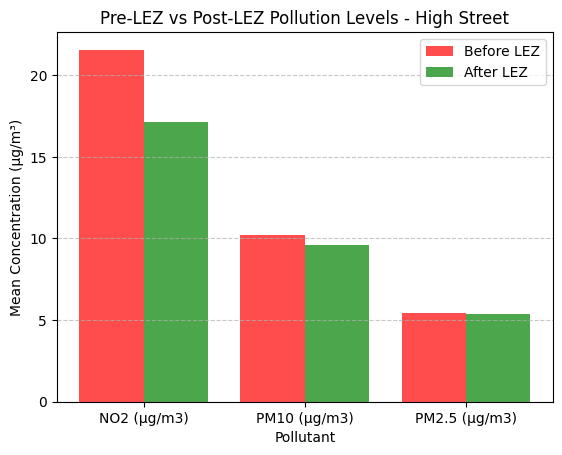

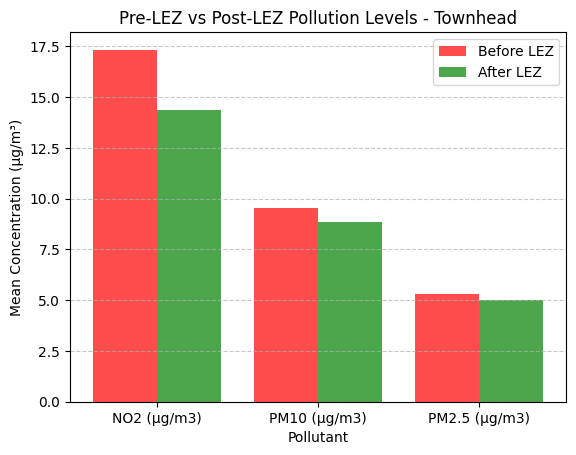

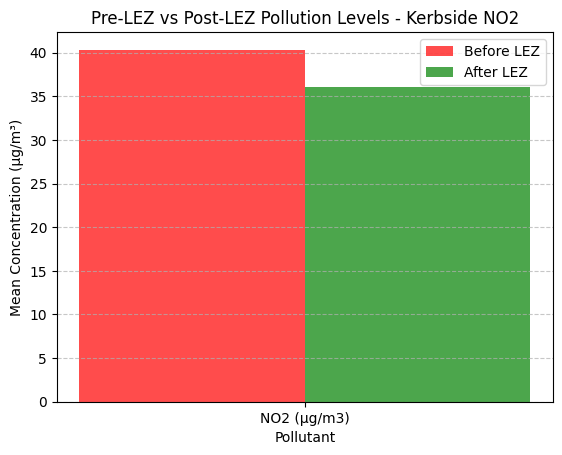

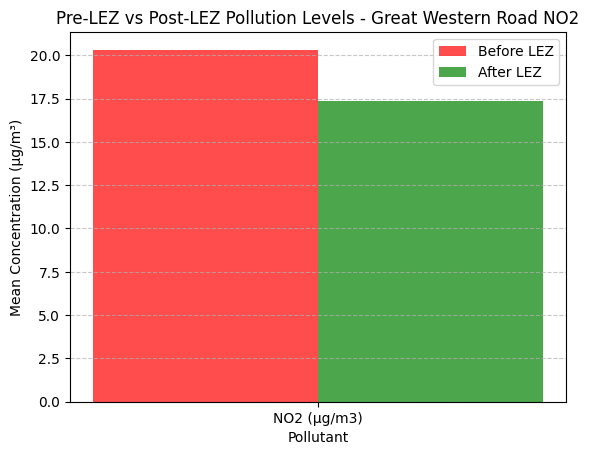

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot statistical differences for each station (No Stars)
def plot_statistical_difference(stat_results):
    for station, pollutants in stat_results.items():
        valid_pollutants = [p for p in pollutants if isinstance(pollutants[p], dict)]  # Filter valid results

        if valid_pollutants:
            pre_means = [pollutants[p]['Pre-LEZ Mean'] for p in valid_pollutants]
            post_means = [pollutants[p]['Post-LEZ Mean'] for p in valid_pollutants]

            x = np.arange(len(valid_pollutants))  # X-axis positions
            width = 0.4  # Bar width

            plt.figure()#figsize=(10, 6))
            plt.bar(x - width/2, pre_means, width, label="Before LEZ", color='red', alpha=0.7)
            plt.bar(x + width/2, post_means, width, label="After LEZ", color='green', alpha=0.7)

            plt.xlabel("Pollutant")
            plt.ylabel("Mean Concentration (µg/m³)")
            plt.title(f"Pre-LEZ vs Post-LEZ Pollution Levels - {station}")
            plt.xticks(ticks=x, labels=valid_pollutants)
            plt.legend()
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

# Run visualization function
plot_statistical_difference(stat_results)

In most locations, there is a noticeable reduction in NO₂ levels, suggesting a positive impact of the LEZ on air quality. However, in Anderston, NO₂ levels slightly increased post-LEZ.

For PM10 and PM2.5, the results vary by location. In Byres Road, High Street, and Townhead, there is a moderate reduction in PM10 and PM2.5 levels after the LEZ was enforced. This aligns with the expectation that restricting high-emission vehicles would reduce particulate matter. However, in Anderston, PM10 and PM2.5 levels remained relatively unchanged, possibly indicating contributions from other pollution sources such as construction or industrial activities.

Kerbside and Great Western Road, both major traffic areas, showed significant reductions in NO₂ levels, highlighting the effectiveness of the LEZ in these locations. This suggests that areas with high vehicle congestion benefited the most from the emission restrictions.

Overall, while the LEZ appears to have contributed to lower pollutant concentrations in several locations, factors such as weather conditions, traffic rerouting, and external pollution sources may have influenced variations in the impact. Further statistical testing would be needed to confirm the significance of these differences.

We also used the permutation test to confirm the observations from the T-test. A Permutation test is another statistical method to determine the statistical significance.

It is suitable for data that is not normally distributed, as in the case of air pollution levels data, which is characterized by log-normal distribution.

In [ ]:
import scipy.stats  # Import the scipy module

# Define a function to calculate the difference in means
def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

# Define pre-LEZ and post-LEZ datasets based on implementation date (1 June 2023)
pre_LEZ = df_LEZ[df_LEZ['Datetime'] < '2023-06-01']
post_LEZ = df_LEZ[df_LEZ['Datetime'] >= '2023-06-01']

# Perform the permutation test
result = scipy.stats.permutation_test(
    (pre_LEZ['NO2 (µg/m3)'].dropna(), post_LEZ['NO2 (µg/m3)'].dropna()),
    statistic=diff_of_means,  # Function to calculate the statistic
    permutation_type='independent',  # Two-sample test
    n_resamples=1000,  # Number of permutations
    random_state=42  # Set random seed for reproducibility
)

# Interpret results
if result.pvalue < 0.05:
    print("Statistically significant decrease in NO₂ after LEZ.")
else:
    print("No statistically significant change in NO₂ after LEZ.")


Statistically significant decrease in NO₂ after LEZ.



The result of the permutation test confirms that NO₂ levels significantly decreased after the introduction of the Low Emission Zone (LEZ).